<a href="https://colab.research.google.com/github/KahaiaK/K.K/blob/main/Qui_est_sera_le_prochain_Nadal_%C3%A0_Roland_Garros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nettoyage des données : harmoniser les noms de colonnes, convertir les dates, gérer les valeurs manquantes.

Ajout de colonnes utiles : vainqueur/défenseur, round, durée du match, sets gagnés, etc.

Statistiques individuelles : performance par joueur, win/loss ratio, performance en service, etc.

Top 10 avec/sans Nadal : fréquence des victoires, % de matchs gagnés, etc.

Facteurs de succès : analyse corrélée des variables (1ères balles, fautes directes, etc.).

Visualisations (avec seaborn, matplotlib, ou plotly).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
year_range = list(range(2000, 2024))
rg_dfs=[]

for year in year_range:
    url = f"https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{year}.csv"

    try:
        df = pd.read_csv(url)
        df_rg = df[df['tourney_name'] == 'Roland Garros'].copy()
        df_rg['year'] = year
        rg_dfs.append(df_rg)
        print(f"✅ Année {year} chargée : {len(df_rg)} matchs")
    except Exception as e:
        print(f"❌ Problème pour l'année {year} : {e}")

# Concaténation de toutes les années dans un seul DataFrame
roland_garros_df = pd.concat(rg_dfs, ignore_index=True)

# Aperçu des données
roland_garros_df.head()

✅ Année 2000 chargée : 127 matchs
✅ Année 2001 chargée : 127 matchs
✅ Année 2002 chargée : 127 matchs
✅ Année 2003 chargée : 127 matchs
✅ Année 2004 chargée : 127 matchs
✅ Année 2005 chargée : 127 matchs
✅ Année 2006 chargée : 127 matchs
✅ Année 2007 chargée : 127 matchs
✅ Année 2008 chargée : 127 matchs
✅ Année 2009 chargée : 127 matchs
✅ Année 2010 chargée : 127 matchs
✅ Année 2011 chargée : 127 matchs
✅ Année 2012 chargée : 127 matchs
✅ Année 2013 chargée : 127 matchs
✅ Année 2014 chargée : 127 matchs
✅ Année 2015 chargée : 127 matchs
✅ Année 2016 chargée : 127 matchs
✅ Année 2017 chargée : 127 matchs
✅ Année 2018 chargée : 127 matchs
✅ Année 2019 chargée : 127 matchs
✅ Année 2020 chargée : 127 matchs
✅ Année 2021 chargée : 127 matchs
✅ Année 2022 chargée : 127 matchs
✅ Année 2023 chargée : 127 matchs


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2000-520,Roland Garros,Clay,128,G,20000529,1,101736,1.0,NaN,...,38.0,22.0,16.0,9.0,13.0,1.0,5085.0,116.0,355.0,2000
1,2000-520,Roland Garros,Clay,128,G,20000529,2,102344,NaN,NaN,...,13.0,9.0,11.0,14.0,23.0,40.0,845.0,219.0,158.0,2000
2,2000-520,Roland Garros,Clay,128,G,20000529,3,103181,NaN,NaN,...,65.0,15.0,23.0,12.0,25.0,88.0,463.0,83.0,494.0,2000
3,2000-520,Roland Garros,Clay,128,G,20000529,4,102644,NaN,NaN,...,27.0,17.0,16.0,9.0,17.0,45.0,802.0,110.0,376.0,2000
4,2000-520,Roland Garros,Clay,128,G,20000529,5,103454,NaN,NaN,...,36.0,10.0,14.0,5.0,12.0,75.0,579.0,130.0,310.0,2000


In [3]:
import pandas as pd


year_range = list(range(2000, 2025))
rg_dfs = []

for year in year_range:
    url = f"https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{year}.csv"

    try:
        df = pd.read_csv(url)
        df_rg = df[df['tourney_name'] == 'Roland Garros'].copy()
        df_rg['year'] = year
        rg_dfs.append(df_rg)
        print(f"✅ Données {year} chargées : {len(df_rg)} matchs RG")
    except Exception as e:
        print(f"⚠️ Erreur pour {year} : {e}")

# Fusionner toutes les années dans un DataFrame unique
roland_garros_df = pd.concat(rg_dfs, ignore_index=True)

# Aperçu
print(f"\n🔎 Total de matchs à Roland-Garros : {roland_garros_df.shape[0]}")
roland_garros_df.head()


✅ Données 2000 chargées : 127 matchs RG
✅ Données 2001 chargées : 127 matchs RG
✅ Données 2002 chargées : 127 matchs RG
✅ Données 2003 chargées : 127 matchs RG
✅ Données 2004 chargées : 127 matchs RG
✅ Données 2005 chargées : 127 matchs RG
✅ Données 2006 chargées : 127 matchs RG
✅ Données 2007 chargées : 127 matchs RG
✅ Données 2008 chargées : 127 matchs RG
✅ Données 2009 chargées : 127 matchs RG
✅ Données 2010 chargées : 127 matchs RG
✅ Données 2011 chargées : 127 matchs RG
✅ Données 2012 chargées : 127 matchs RG
✅ Données 2013 chargées : 127 matchs RG
✅ Données 2014 chargées : 127 matchs RG
✅ Données 2015 chargées : 127 matchs RG
✅ Données 2016 chargées : 127 matchs RG
✅ Données 2017 chargées : 127 matchs RG
✅ Données 2018 chargées : 127 matchs RG
✅ Données 2019 chargées : 127 matchs RG
✅ Données 2020 chargées : 127 matchs RG
✅ Données 2021 chargées : 127 matchs RG
✅ Données 2022 chargées : 127 matchs RG
✅ Données 2023 chargées : 127 matchs RG
✅ Données 2024 chargées : 127 matchs RG


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2000-520,Roland Garros,Clay,128,G,20000529,1,101736,1.0,NaN,...,38.0,22.0,16.0,9.0,13.0,1.0,5085.0,116.0,355.0,2000
1,2000-520,Roland Garros,Clay,128,G,20000529,2,102344,NaN,NaN,...,13.0,9.0,11.0,14.0,23.0,40.0,845.0,219.0,158.0,2000
2,2000-520,Roland Garros,Clay,128,G,20000529,3,103181,NaN,NaN,...,65.0,15.0,23.0,12.0,25.0,88.0,463.0,83.0,494.0,2000
3,2000-520,Roland Garros,Clay,128,G,20000529,4,102644,NaN,NaN,...,27.0,17.0,16.0,9.0,17.0,45.0,802.0,110.0,376.0,2000
4,2000-520,Roland Garros,Clay,128,G,20000529,5,103454,NaN,NaN,...,36.0,10.0,14.0,5.0,12.0,75.0,579.0,130.0,310.0,2000


In [4]:
# Nettoyage initial : suppression des lignes avec trop de valeurs manquantes
roland_garros_df = roland_garros_df.dropna(subset=['winner_name', 'loser_name', 'score'])

# Normalisation des noms de colonnes
roland_garros_df.columns = roland_garros_df.columns.str.lower()

# Convertir la colonne 'tourney_date' en datetime
roland_garros_df['tourney_date']= pd.to_datetime(roland_garros_df['tourney_date'], format='%Y%m%d')

roland_garros_df.head(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stwon,l_2ndwon,l_svgms,l_bpsaved,l_bpfaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2000-520,Roland Garros,Clay,128,G,2000-05-29,1,101736,1.0,NaN,...,38.0,22.0,16.0,9.0,13.0,1.0,5085.0,116.0,355.0,2000
1,2000-520,Roland Garros,Clay,128,G,2000-05-29,2,102344,NaN,NaN,...,13.0,9.0,11.0,14.0,23.0,40.0,845.0,219.0,158.0,2000
2,2000-520,Roland Garros,Clay,128,G,2000-05-29,3,103181,NaN,NaN,...,65.0,15.0,23.0,12.0,25.0,88.0,463.0,83.0,494.0,2000
3,2000-520,Roland Garros,Clay,128,G,2000-05-29,4,102644,NaN,NaN,...,27.0,17.0,16.0,9.0,17.0,45.0,802.0,110.0,376.0,2000
4,2000-520,Roland Garros,Clay,128,G,2000-05-29,5,103454,NaN,NaN,...,36.0,10.0,14.0,5.0,12.0,75.0,579.0,130.0,310.0,2000


In [5]:
# Extraire les sets gagnés par le vainqueur et le perdant à partir du score
def extract_sets_won(score):
  try:
    sets = score.split()
    # Changed '_' to '-' based on common score formats
    w_set = sum(int(s[0]) > int(s[2]) for s in sets if '-' in s)
    # Changed '_' to '-' based on common score formats
    l_set = sum(int(s[0]) < int(s[2]) for s in sets if '-' in s)
    return w_set, l_set
  except:
    # Return a tuple of NaNs, which is consistently treated as two values
    return (np.nan, np.nan)

roland_garros_df[['winner_sets', 'loser_sets']] = roland_garros_df['score'].apply(lambda x: pd.Series(extract_sets_won(x)))

In [6]:
# Calcul du nombre total de sets
roland_garros_df['total_sets'] = roland_garros_df['winner_sets'] + roland_garros_df['loser_sets']

# Création d’une variable "match_duration_minutes" (déjà disponible à partir de certaines années)
roland_garros_df['match_duration'] = pd.to_numeric(roland_garros_df['minutes'], errors='coerce')

# Nettoyage des noms
roland_garros_df['winner_name'] = roland_garros_df['winner_name'].str.strip()
roland_garros_df['loser_name'] = roland_garros_df['loser_name'].str.strip()

# Affichage d’un aperçu des données nettoyées
roland_garros_df[['year', 'round', 'winner_name', 'loser_name', 'score', 'winner_sets', 'loser_sets', 'match_duration', 'loser_id', 'winner_id', 'winner_hand','loser_hand','winner_ht','loser_ht','winner_rank','loser_rank','winner_age','loser_age']]

,year,round,winner_name,loser_name,score,winner_sets,loser_sets,match_duration,loser_id,winner_id,winner_hand,loser_hand,winner_ht,loser_ht,winner_rank,loser_rank,winner_age,loser_age
0,2000,R128,Andre Agassi,Antony Dupuis,7-6(7) 6-3 6-4,3.0,0.0,132.0,102179,101736,R,R,180.0,185.0,1.0,116.0,30.0,27.2
1,2000,R128,Karol Kucera,Oscar Serrano,6-1 6-2 6-1,3.0,0.0,75.0,103202,102344,R,R,188.0,173.0,40.0,219.0,26.2,22.0
2,2000,R128,Jiri Vanek,Alberto Berasategui,6-1 6-1 6-7(5) 5-7 6-1,3.0,2.0,187.0,102238,103181,R,R,185.0,173.0,88.0,83.0,22.0,26.9
3,2000,R128,Franco Squillari,Alexander Popp,3-6 6-3 6-2 6-0,3.0,1.0,117.0,102880,102644,L,R,183.0,201.0,45.0,110.0,24.7,23.5
4,2000,R128,Nicolas Massu,Jacobo Diaz,6-4 6-3 6-3,3.0,0.0,130.0,102831,103454,R,R,183.0,173.0,75.0,130.0,20.6,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,2024,R128,Alexander Shevchenko,Aslan Karatsev,6-4 4-6 1-6 6-1 6-4,3.0,2.0,NaN,106234,207686,R,R,185.0,185.0,59.0,82.0,23.4,30.7
3171,2024,R128,Henri Squire,Max Purcell,6-2 6-2 3-6 4-6 7-6(10),3.0,2.0,NaN,126845,202260,R,R,196.0,185.0,221.0,94.0,23.6,26.1
3172,2024,R128,Jan Lennard Struff,Roman Andres Burruchaga,6-3 6-2 6-1,3.0,0.0,NaN,208882,105526,R,R,193.0,183.0,41.0,144.0,34.0,22.3
3173,2024,R128,Stan Wawrinka,Andy Murray,6-4 6-4 6-2,3.0,0.0,NaN,104918,104527,R,R,183.0,191.0,98.0,75.0,39.1,37.0


In [7]:
# Calcul du nombre total de sets
roland_garros_df['total_sets'] = roland_garros_df['winner_sets'] + roland_garros_df['loser_sets']

# Création de la variable "match_duration"
roland_garros_df['match_duration'] = pd.to_numeric(roland_garros_df['minutes'], errors='coerce')

# Nettoyage des noms
roland_garros_df['winner_name'] = roland_garros_df['winner_name'].str.strip()
roland_garros_df['loser_name'] = roland_garros_df['loser_name'].str.strip()

# Sélection des colonnes pertinentes
df = roland_garros_df[['year', 'round', 'winner_name', 'loser_name', 'score', 'winner_sets', 'loser_sets', 'match_duration', 'loser_id', 'winner_id', 'winner_hand','loser_hand','winner_ht','loser_ht','winner_rank','loser_rank','winner_age','loser_age']].copy()

# Sauvegarde du fichier CSV
df.to_csv('roland_garros_clean.csv', index=False)

# Télécharger le fichier CSV
from google.colab import files
files.download('roland_garros_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Top 10 avec/sans Nadal : fréquence des victoires, % de matchs gagnés, etc.

In [8]:
# Regrouper les victoires par joueur
winner_counts = (
    roland_garros_df.groupby('winner_name')
    .size()
    .reset_index(name='wins')
    .sort_values(by='wins', ascending=False)
)
# Affichage du Top 10 avec Nadal
top10_with_Nadal = winner_counts.head(10)
print("Top 10 Rolland Garros(2000-20024)- AVEC NADAL")
display (top10_with_Nadal)

# Supprimer Nadal et recalculer le Top 10
top10_without_Nadal = winner_counts[winner_counts['winner_name'] != 'Rafael Nadal']
top10_without_Nadal = top10_without_Nadal.head(10)

print("Top 10 Rolland Garros(2000-20024)- SANS NADAL")
display (top10_without_Nadal)

Top 10 Rolland Garros(2000-20024)- AVEC NADAL


,winner_name,wins
378,Rafael Nadal,112
346,Novak Djokovic,97
392,Roger Federer,73
417,Stan Wawrinka,46
92,David Ferrer,44
43,Andy Murray,39
149,Gael Monfils,39
452,Tommy Robredo,37
230,Juan Carlos Ferrero,34
21,Alexander Zverev,34


Top 10 Rolland Garros(2000-20024)- SANS NADAL


,winner_name,wins
346,Novak Djokovic,97
392,Roger Federer,73
417,Stan Wawrinka,46
92,David Ferrer,44
43,Andy Murray,39
149,Gael Monfils,39
452,Tommy Robredo,37
230,Juan Carlos Ferrero,34
21,Alexander Zverev,34
135,Fernando Verdasco,32


In [45]:
top10_with_Nadal.to_csv('top10_with_Nadal.csv', index=False)
top10_without_Nadal.to_csv('top10_without_Nadal.csv', index=False)
from google.colab import files
files.download('top10_with_Nadal.csv')
files.download('top10_without_Nadal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Sauvegarde du fichier CSV
top10_with_Nadal.to_csv('top10_with_Nadal.csv', index=False)
top10_without_Nadal.to_csv('top10_without_Nadal.csv', index=False)

<ipython-input-10-6aab881000e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_with_Nadal, x='wins', y='winner_name', ax=axs[0], palette='rocket')
<ipython-input-10-6aab881000e0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_without_Nadal, x='wins', y='winner_name', ax=axs[1], palette='mako')


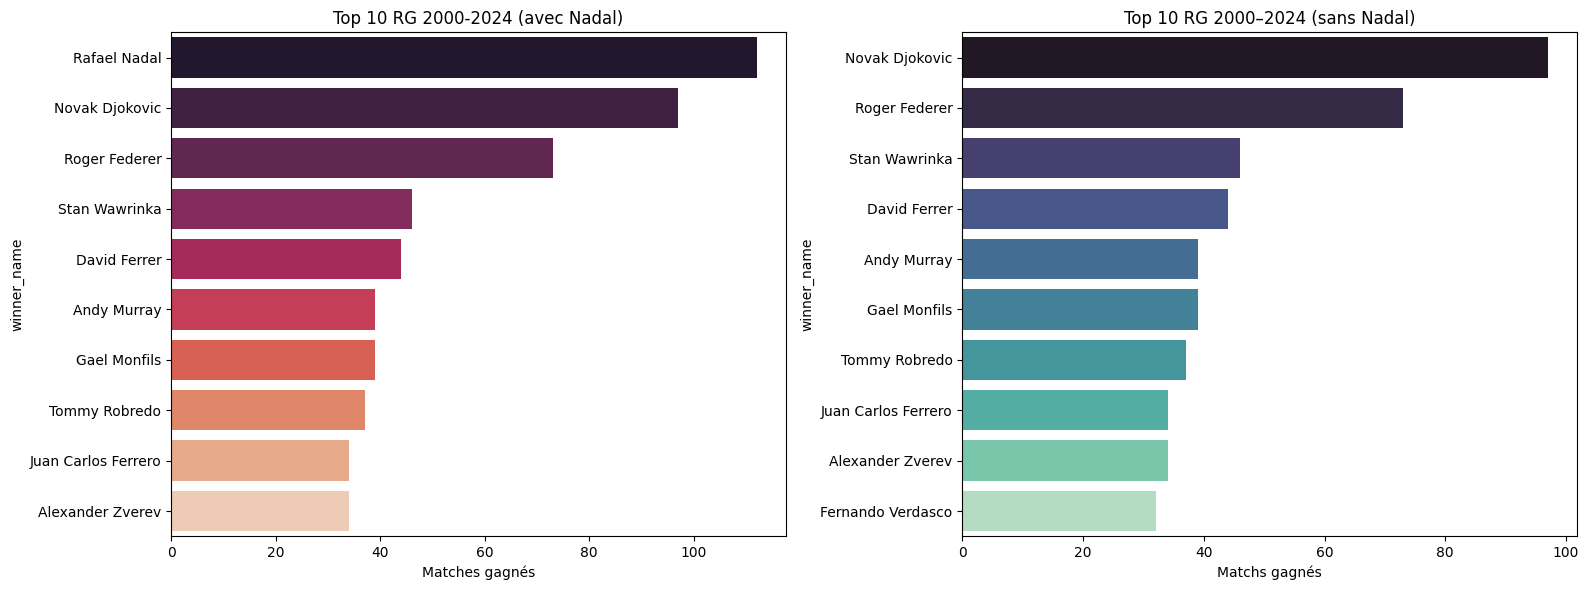

In [10]:
# Visualisation du Top 10 avec et sans Nadal
fig, axs= plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=top10_with_Nadal, x='wins', y='winner_name', ax=axs[0], palette='rocket')
axs[0].set_title('Top 10 RG 2000-2024 (avec Nadal)')
axs[0].set_xlabel('Matches gagnés')

sns.barplot(data=top10_without_Nadal, x='wins', y='winner_name', ax=axs[1], palette='mako')
axs[1].set_title('Top 10 RG 2000–2024 (sans Nadal)')
axs[1].set_xlabel('Matchs gagnés')

plt.tight_layout()
plt.show()

In [11]:
# Sélection des colonnes pertinentes, incluant 'total_sets'
df = roland_garros_df[['year', 'round', 'winner_name', 'loser_name', 'score', 'winner_sets', 'loser_sets', 'total_sets', 'match_duration', 'loser_id', 'winner_id', 'winner_hand','loser_hand','winner_ht','loser_ht','winner_rank','loser_rank','winner_age','loser_age']].copy()

In [44]:
roland_garros_df.to_csv('roland_garros.csv', index=False)
from google.colab import files
files.download('roland_garros.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Analyse des facteurs de succès du Top 10
  Objectif : Voir ce qui distingue les meilleurs joueurs de RG en termes de style de jeu et performance.

Bloc : Statistiques moyennes des joueurs du Top 10

In [12]:
# Définir le Top 10 (avec Nadal) en fonction des victoires
top10_names = df['winner_name'].value_counts().head(10).index.tolist()

# Filtrer les matchs gagnés par les joueurs du Top 10
top10_df = df[df['winner_name'].isin(top10_names)].copy()

# Statistiques moyennes par joueur
top10_stats = (
    top10_df
    .groupby('winner_name')
    .agg(
        # Aggregate winner_sets for average sets won
        avg_sets_won=('winner_sets', 'mean'),
        avg_sets_lost=('loser_sets', 'mean'),
        avg_total_sets=('total_sets', 'mean'),
        avg_duration=('match_duration', 'mean'),

        # Use 'year' or another existing column to count matches played
        matches_played=('year', 'count')
    )
    .sort_values(by='matches_played', ascending=False)
)

top10_stats.round(2)

,avg_sets_won,avg_sets_lost,avg_total_sets,avg_duration,matches_played
winner_name,,,,,
Rafael Nadal,2.96,0.22,3.19,144.36,112
Novak Djokovic,2.94,0.41,3.35,144.75,97
Roger Federer,2.99,0.44,3.42,132.25,73
Stan Wawrinka,3.00,0.72,3.72,161.69,46
David Ferrer,3.00,0.35,3.35,131.30,44
Andy Murray,2.97,0.68,3.66,159.95,39
Gael Monfils,2.97,0.92,3.90,155.66,39
Tommy Robredo,2.97,0.65,3.62,141.73,37
Alexander Zverev,3.00,0.79,3.79,162.04,34


* Identifier les successeurs potentiels de Nadal
    Objectif : Trouver les joueurs récents (hors Nadal) avec le plus de victoires et de constance à RG.

Bloc : Joueurs post-2020 (sans Nadal)

In [41]:
recent_df = df[(df['year']>=2020) & (df['winner_name'] != 'Rafael Nadal')]

potentiel_successeurs = (
    recent_df['winner_name']
    .value_counts()
    .head(100)
    .reset_index()
    .rename(columns={'index':'player','winner_name': 'matches_won'})
)

potentiel_successeurs.round(2)

,matches_won,count
0,Novak Djokovic,28
1,Alexander Zverev,24
2,Stefanos Tsitsipas,22
3,Casper Ruud,21
4,Carlos Alcaraz,18
...,...,...
95,Nikoloz Basilashvili,2
96,Alex Molcan,2
97,Alexander Shevchenko,2
98,Jozef Kovalik,2


In [42]:
potentiel_successeurs.to_csv('potentiel_successeurs.csv', index=False)
from google.colab import files
files.download('potentiel_successeurs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analyse par nationalité et âge
Bloc : Récupérer les métadonnées des joueurs